In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [27]:
data = pd.read_csv('website_dataset.csv')
data

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


## Data Cleaning

In [3]:
# Step 1 :: Align the column name properly with respect to dataset as it's showing 'unnamed' means index 0 will assign to column and re-indexing

In [28]:
data.columns = data.iloc[0]

In [29]:
data.head(5)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [30]:
data = data.drop(index = 0).reset_index(drop = True)

In [31]:
data.head(5)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [9]:
# Step 2 :: Re-Structing the column name for making it more easier to understand (shortening the column name)

In [32]:
data.columns = ["Channel_group", "Date_hour", "Users", "Sessions", "Engaged_sessions", "Average_engagement_per_session", "Engaged_sessions_per_user", "Events_per_session", "Engagement_rate", "Event_count"]
data.head(5)

,Channel_group,Date_hour,Users,Sessions,Engaged_sessions,Average_engagement_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [33]:
data.info() #Checking the data information (types of data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Channel_group                   3182 non-null   object
 1   Date_hour                       3182 non-null   object
 2   Users                           3182 non-null   object
 3   Sessions                        3182 non-null   object
 4   Engaged_sessions                3182 non-null   object
 5   Average_engagement_per_session  3182 non-null   object
 6   Engaged_sessions_per_user       3182 non-null   object
 7   Events_per_session              3182 non-null   object
 8   Engagement_rate                 3182 non-null   object
 9   Event_count                     3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [14]:
# Step 3 :: Converting data to readable data, format dataset to proper data type

In [37]:
data['Date_hour'] = pd.to_datetime(data['Date_hour'],format = "%Y%m%d%H", errors = 'coerce')
data.head(5)

,Channel_group,Date_hour,Users,Sessions,Engaged_sessions,Average_engagement_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   object        
 3   Sessions                        3182 non-null   object        
 4   Engaged_sessions                3182 non-null   object        
 5   Average_engagement_per_session  3182 non-null   object        
 6   Engaged_sessions_per_user       3182 non-null   object        
 7   Events_per_session              3182 non-null   object        
 8   Engagement_rate                 3182 non-null   object        
 9   Event_count                     3182 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 248.7+ KB


In [40]:
non_numeric_columns = data.columns.drop(['Channel_group', 'Date_hour'])
data[non_numeric_columns] = data[non_numeric_columns].apply(pd.to_numeric, errors= 'coerce')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 248.

In [42]:
data['Hour'] = data['Date_hour'].dt.hour
data.head(5)

,Channel_group,Date_hour,Users,Sessions,Engaged_sessions,Average_engagement_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

In [44]:
# Data Sight :: Everything is properly formatted, no null value, no missing value.

In [45]:
data.describe()

,Date_hour,Users,Sessions,Engaged_sessions,Average_engagement_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


## Question 1 :: What pattern do you observe in website sessions and users over time?

In [46]:
sbn.set(style = 'whitegrid')

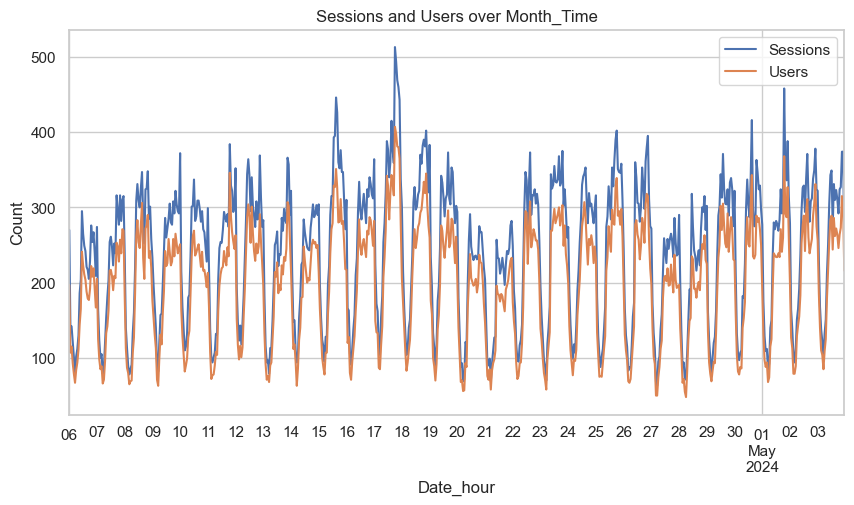

In [56]:
plt.figure(figsize=(10,5))
data.groupby('Date_hour')[['Sessions', 'Users']].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over Month_Time")
plt.xlabel("Date_hour")
plt.ylabel("Count")
plt.show()

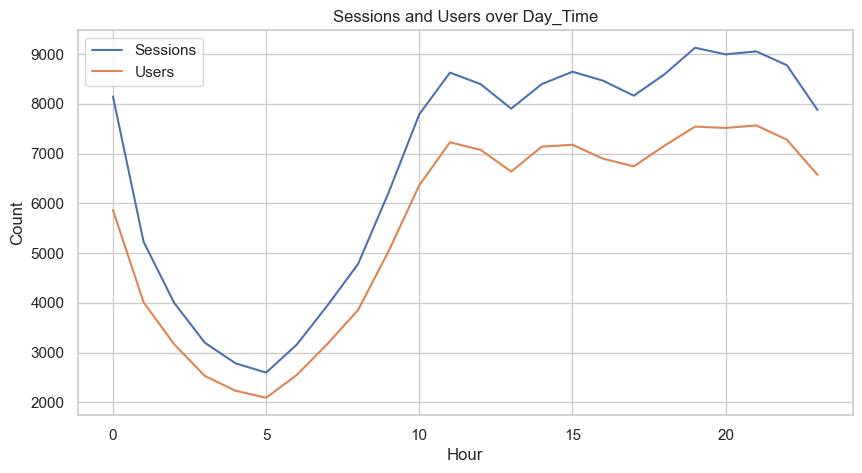

In [57]:
plt.figure(figsize=(10,5))
data.groupby('Hour')[['Sessions', 'Users']].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over Day_Time")
plt.xlabel("Hour")
plt.ylabel('Count')
plt.show()

## Question 2 :: Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

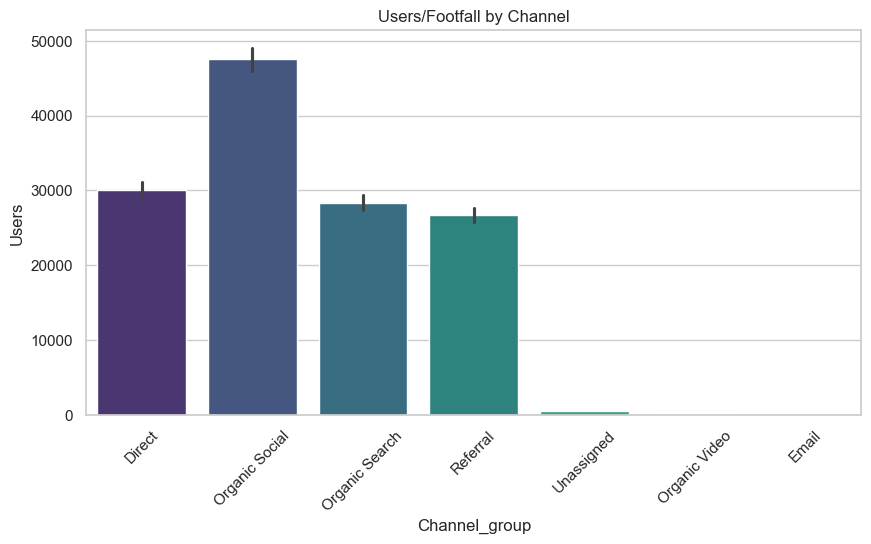

In [61]:
plt.figure(figsize=(10,5))
sbn.barplot(data, x = 'Channel_group', y = 'Users', estimator= np.sum, palette = 'viridis', hue='Channel_group', legend = False)
plt.title("Users/Footfall by Channel")
plt.xticks(rotation = 45)
plt.show()

## Question 3 :: Which channel has the highest average engagement time, and what does that tell us about user behaviour and content effectiveness?

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

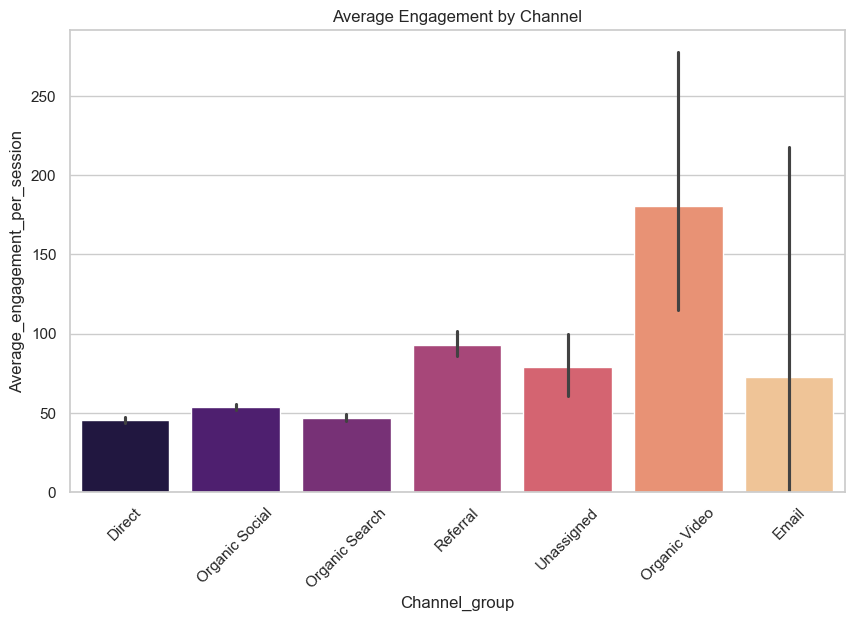

In [66]:
plt.figure(figsize=(10,6))
sbn.barplot(data, x= 'Channel_group', y = "Average_engagement_per_session", estimator = np.mean, palette = 'magma', hue='Channel_group', legend = False)
plt.title("Average Engagement by Channel")
plt.xticks(rotation = 45)
plt.show()

## Question 4 :: How does engagement rate vary across different traffic channels?

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

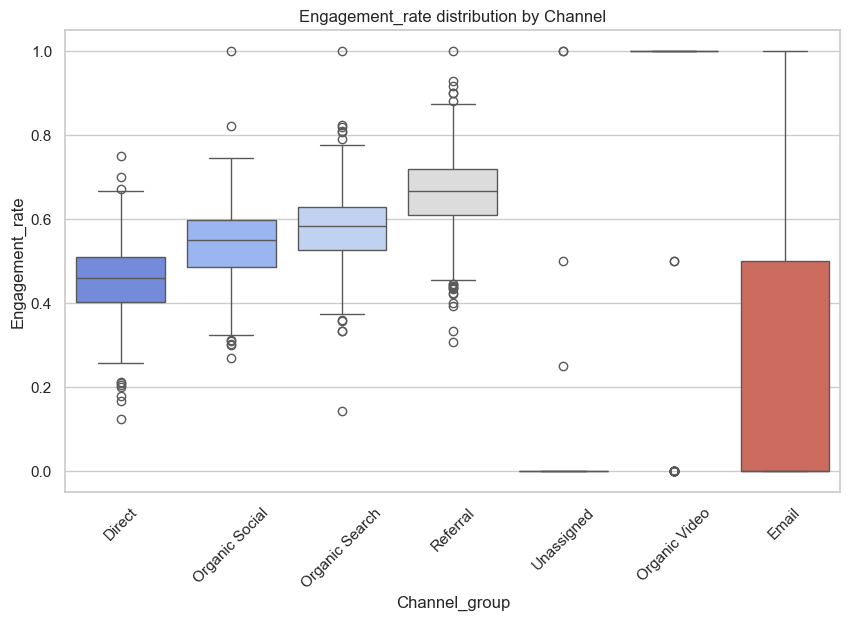

In [68]:
plt.figure(figsize=(10,6))
sbn.boxplot(data, x= 'Channel_group', y = "Engagement_rate", palette = 'coolwarm', hue='Channel_group', legend = False)
plt.title("Engagement_rate distribution by Channel")
plt.xticks(rotation = 45)
plt.show()

## Question 5 :: Which channels drive more engaged sessions than non-engaged ones, and what strategies can improve engagement in underperforming channels?

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

In [73]:
session_data = data.groupby("Channel_group")[['Sessions', 'Engaged_sessions']].sum().reset_index()
session_data['non_engaged'] = session_data['Sessions'] - session_data['Engaged_sessions']
session_data_melted = session_data.melt(id_vars = 'Channel_group', value_vars=['Engaged_sessions', 'non_engaged'])

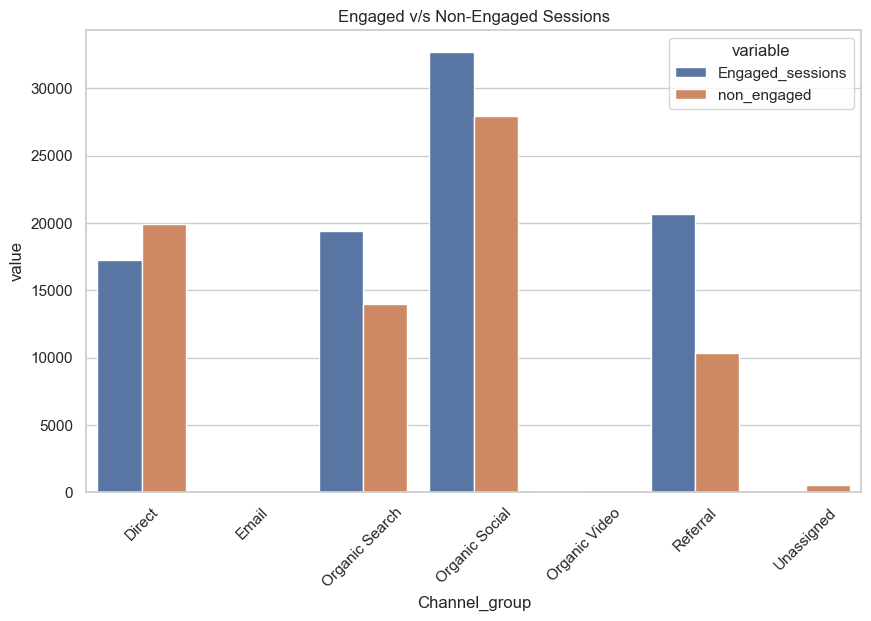

In [74]:
plt.figure(figsize=(10,6))
sbn.barplot(data = session_data_melted, x= 'Channel_group', y = "value", hue='variable')
plt.title("Engaged v/s Non-Engaged Sessions")
plt.xticks(rotation = 45)
plt.show()

## Question 6 :: At what hours of the day does each channel drive the most traffic?

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

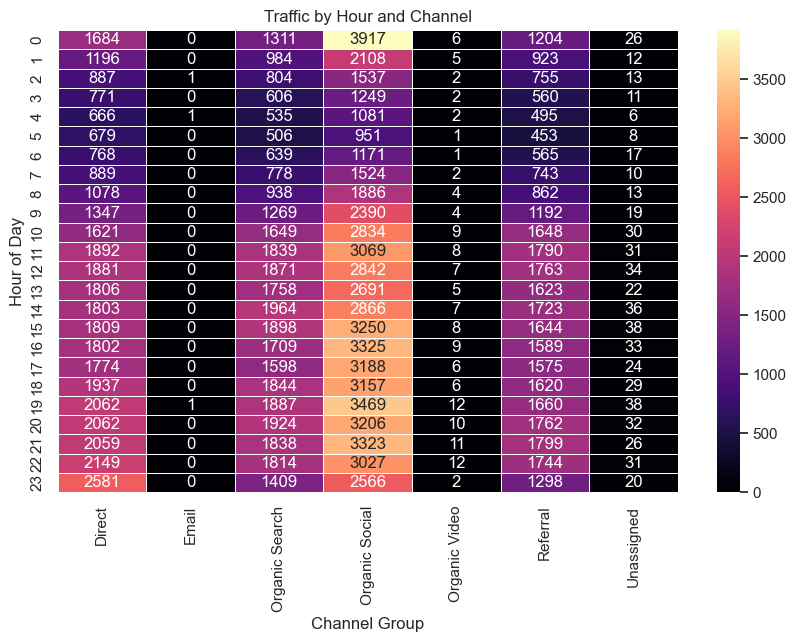

In [78]:
heatmap_data = data.groupby(['Hour', 'Channel_group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(10,6))
sbn.heatmap(heatmap_data, cmap= "magma", linewidths = .5, annot = True, fmt = '.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel('Channel Group')
plt.ylabel('Hour of Day')
plt.show()

## Question 7 :: Is there any correlation between high traffic (session) and high engagement rate over time?

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Channel_group                   3182 non-null   object        
 1   Date_hour                       3182 non-null   datetime64[ns]
 2   Users                           3182 non-null   int64         
 3   Sessions                        3182 non-null   int64         
 4   Engaged_sessions                3182 non-null   int64         
 5   Average_engagement_per_session  3182 non-null   float64       
 6   Engaged_sessions_per_user       3182 non-null   float64       
 7   Events_per_session              3182 non-null   float64       
 8   Engagement_rate                 3182 non-null   float64       
 9   Event_count                     3182 non-null   int64         
 10  Hour                            3182 non-null   int32         
dtypes: d

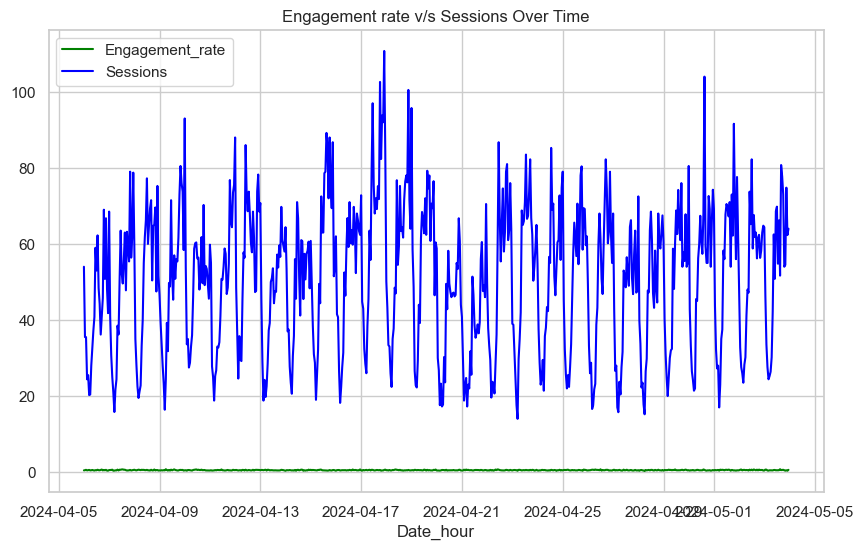

In [80]:
data_plot = data.groupby('Date_hour')[['Engagement_rate', 'Sessions']].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(data_plot['Date_hour'], data_plot['Engagement_rate'], label = 'Engagement_rate', color = 'green')
plt.plot(data_plot['Date_hour'], data_plot['Sessions'], label = 'Sessions', color = 'blue')
plt.title("Engagement rate v/s Sessions Over Time")
plt.xlabel('Date_hour')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Conclusiod/Insight: Here is no such correlation found.